In [30]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Mostrar las primeras filas del dataset
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [31]:
# Eliminar filas con valores faltantes
df.dropna(inplace=True)

# Codificar variables categóricas (Sex y Embarked)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

# Eliminar columnas no necesarias para la selección de características
columns_to_drop = ['Name', 'Ticket', 'Cabin']
df.drop(columns=columns_to_drop, inplace=True)

# Mostrar información del dataset después del preprocesamiento
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Age          183 non-null    float64
 4   SibSp        183 non-null    int64  
 5   Parch        183 non-null    int64  
 6   Fare         183 non-null    float64
 7   Sex_female   183 non-null    bool   
 8   Sex_male     183 non-null    bool   
 9   Embarked_C   183 non-null    bool   
 10  Embarked_Q   183 non-null    bool   
 11  Embarked_S   183 non-null    bool   
dtypes: bool(5), float64(2), int64(5)
memory usage: 12.3 KB
None


In [32]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

# Separar características (X) y variable objetivo (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SelectKBest para seleccionar las mejores características
selector = SelectKBest(score_func=f_classif, k=3)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Mostrar las características seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)


Características seleccionadas: Index(['Age', 'Sex_female', 'Sex_male'], dtype='object')


              precision    recall  f1-score   support

           0       0.70      0.50      0.58        14
           1       0.74      0.87      0.80        23

    accuracy                           0.73        37
   macro avg       0.72      0.68      0.69        37
weighted avg       0.73      0.73      0.72        37



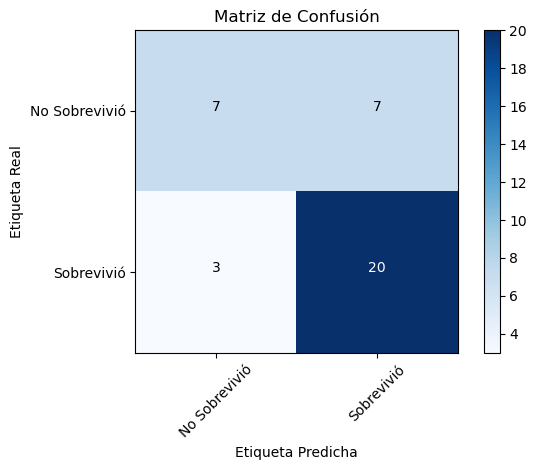

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import itertools  # Importar itertools para utilizar product

# Entrenar un modelo de árbol de decisión
clf = DecisionTreeClassifier()
clf.fit(X_train_selected, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = clf.predict(X_test_selected)
print(classification_report(y_test, y_pred))

# Calcular y visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Matriz de Confusión')
plt.colorbar()

# Etiquetas de los ejes
tick_marks = np.arange(len(set(y_test))) 
plt.xticks(tick_marks, ['No Sobrevivió', 'Sobrevivió'], rotation=45)
plt.yticks(tick_marks, ['No Sobrevivió', 'Sobrevivió'])

# Añadir anotaciones
thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment="center", 
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.tight_layout()
plt.show()


In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predecir las etiquetas del conjunto de prueba
y_pred = clf.predict(X_test_selected)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar métricas de evaluación
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("\nMatriz de Confusión:")
print(conf_matrix)


Accuracy: 0.7297297297297297
Precision: 0.7407407407407407
Recall: 0.8695652173913043
F1-score: 0.7999999999999999

Matriz de Confusión:
[[ 7  7]
 [ 3 20]]


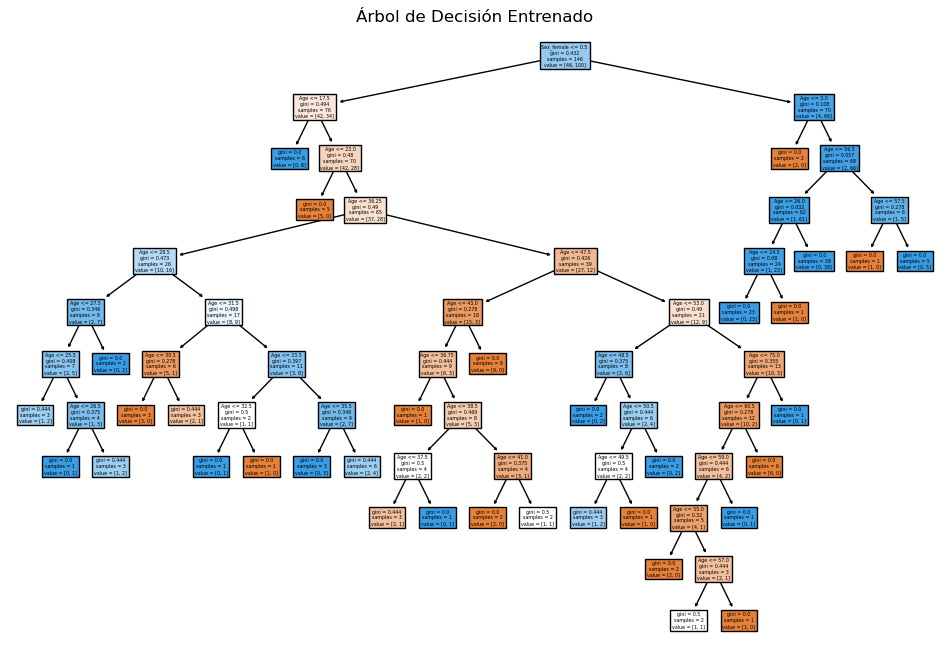

In [40]:
from sklearn import tree

# Visualizar el árbol de decisión entrenado
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=selected_features)
plt.title("Árbol de Decisión Entrenado")
plt.show()


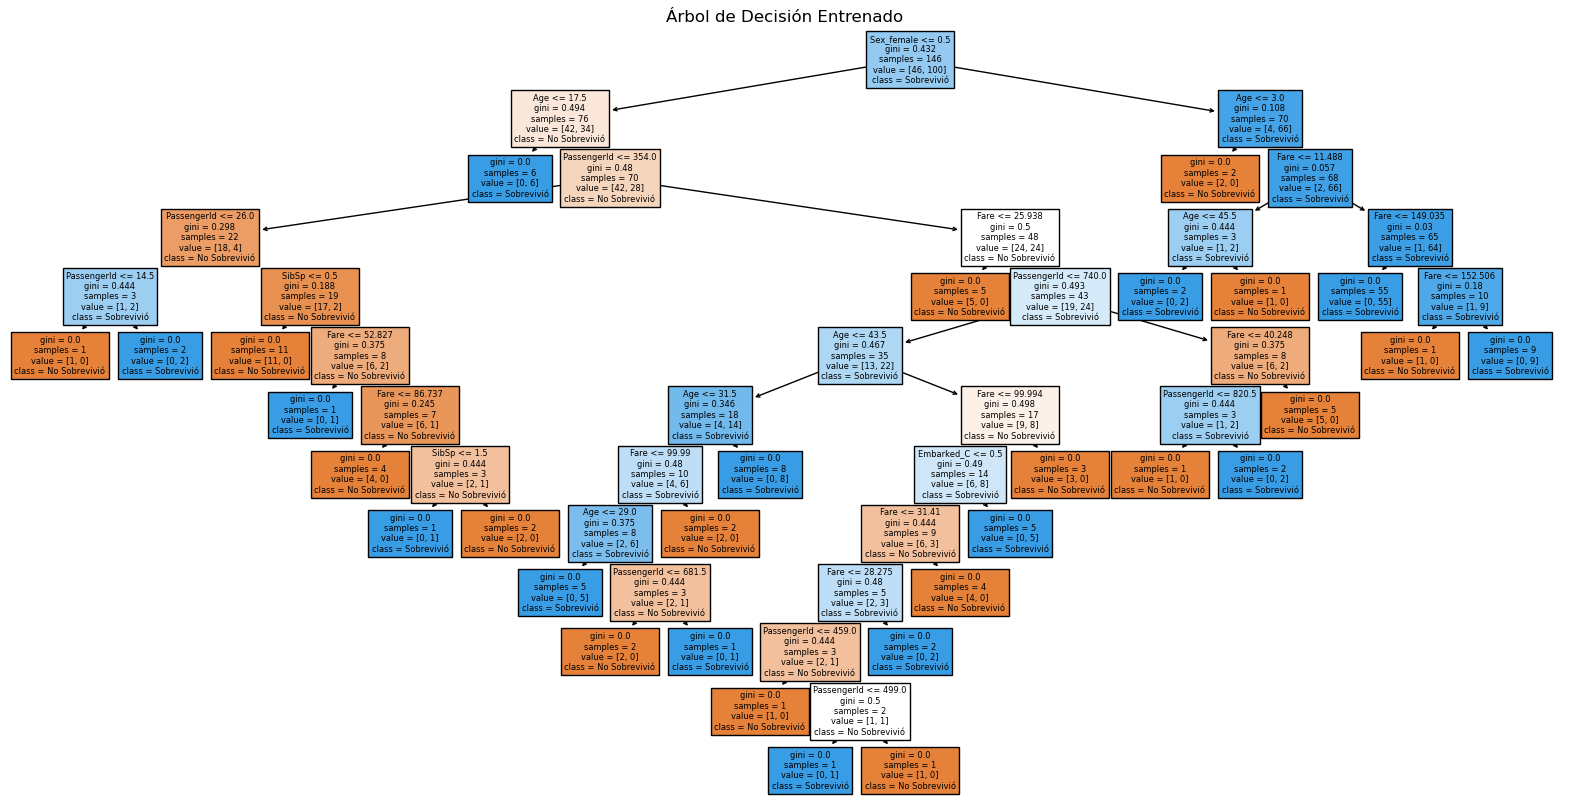

In [48]:
from sklearn.tree import plot_tree

# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=['No Sobrevivió', 'Sobrevivió'])
plt.title('Árbol de Decisión Entrenado')
plt.show()



In [51]:
from sklearn.tree import DecisionTreeClassifier

# Suponiendo que 'clf' es tu modelo de árbol de decisión ya entrenado
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)  # Entrenar el modelo con tus datos

# Obtener la estructura del árbol de decisión
tree_structure = clf.tree_

# Obtener las características utilizadas por el árbol
feature_names = X_train.columns

# Función recursiva para obtener las reglas de división del árbol
def get_tree_rules(node, depth=0):
    if tree_structure.feature[node] != -2:
        feature = feature_names[tree_structure.feature[node]]
        threshold = tree_structure.threshold[node]
        print(f"{'  ' * depth}Si {feature} <= {threshold}:")
        get_tree_rules(tree_structure.children_left[node], depth + 1)
        print(f"{'  ' * depth}Sino (Si {feature} > {threshold}):")
        get_tree_rules(tree_structure.children_right[node], depth + 1)
    else:
        print(f"{'  ' * depth}Clase: {tree_structure.value[node]}")

# Mostrar las reglas de división del árbol
print("Reglas de División del Árbol de Decisión:")
get_tree_rules(0)  # Comenzar desde la raíz del árbol


Reglas de División del Árbol de Decisión:
Si Sex_male <= 0.5:
  Si Age <= 3.0:
    Clase: [[2. 0.]]
  Sino (Si Age > 3.0):
    Si Fare <= 11.487500190734863:
      Si Age <= 45.5:
        Clase: [[0. 2.]]
      Sino (Si Age > 45.5):
        Clase: [[1. 0.]]
    Sino (Si Fare > 11.487500190734863):
      Si Fare <= 149.035400390625:
        Clase: [[ 0. 55.]]
      Sino (Si Fare > 149.035400390625):
        Si Fare <= 152.5062484741211:
          Clase: [[1. 0.]]
        Sino (Si Fare > 152.5062484741211):
          Clase: [[0. 9.]]
Sino (Si Sex_male > 0.5):
  Si Age <= 17.5:
    Clase: [[0. 6.]]
  Sino (Si Age > 17.5):
    Si PassengerId <= 354.0:
      Si PassengerId <= 26.0:
        Si Fare <= 43.68124961853027:
          Clase: [[0. 2.]]
        Sino (Si Fare > 43.68124961853027):
          Clase: [[1. 0.]]
      Sino (Si PassengerId > 26.0):
        Si SibSp <= 0.5:
          Clase: [[11.  0.]]
        Sino (Si SibSp > 0.5):
          Si Fare <= 52.82709884643555:
            Clase